In [5]:
%matplotlib notebook

In [6]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import scipy.stats as stats
import seaborn 

import os
from census import Census
from pprint import pprint
# Census API Key
from config import api_key

buz_info  = 44021
zipcode = pd.read_csv("Resources/Public_ZipCode.csv")
zipcode2 = pd.read_csv("Resources/charter_df.csv")
zipcode.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013.0
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013.0
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616.0
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717.0
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717.0


In [7]:
#API CALL
#zipcode[["zipcode","extra"]] = zipcode["Zip Code"].str.split("-",expand=True)
zcode = zipcode['Zip Code']
zip_pd = pd.DataFrame(zcode)

zcode2 = zipcode2['Zip Code']
zip_pd2 = pd.DataFrame(zcode2)

zip_pd2.head()

,Zip Code
0,45404
1,45207
2,43537
3,44115
4,44663


In [8]:
zip_pd.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [9]:
zcode.head()

0    45810
1    45810
2    44870
3    45760
4    45760
Name: Zip Code, dtype: int64

In [10]:
list(zcode)

[45810,
 45810,
 44870,
 45760,
 45760,
 45013,
 43802,
 43207,
 45656,
 45656,
 45369,
 45503,
 45404,
 45207,
 45631,
 45669,
 43011,
 43901,
 45628,
 43537,
 44122,
 45601,
 44121,
 43604,
 44115,
 44663,
 43344,
 45710,
 44133,
 44857,
 44644,
 43207,
 45414,
 44320,
 44709,
 43604,
 44130,
 44502,
 43609,
 44484,
 45237,
 44883,
 45710,
 44134,
 44111,
 44102,
 44134,
 44134,
 43613,
 44503,
 44817,
 44055,
 45859,
 44256,
 43302,
 43302,
 43430,
 44306,
 44311,
 45850,
 44255,
 44255,
 43138,
 43138,
 43138,
 44030,
 44030,
 44906,
 45601,
 44805,
 44707,
 43920,
 45640,
 43219,
 45850,
 45144,
 45144,
 45651,
 44601,
 45801,
 45212,
 45804,
 44132,
 44102,
 45036,
 45036,
 43229,
 45101,
 43119,
 43227,
 45505,
 43229,
 43207,
 45155,
 44555,
 44134,
 43102,
 44111,
 44123,
 43615,
 45044,
 43229,
 43205,
 43232,
 43204,
 45214,
 44112,
 43102,
 44102,
 45202,
 45410,
 45102,
 45103,
 45224,
 44052,
 43207,
 45103,
 45801,
 43207,
 44485,
 45711,
 45415,
 44509,
 44077,
 43614,


In [11]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels

# set up a parameters dictionary
ZIPCODE = []
PAYANN = []



for code in zcode:  
  
    # base url
    query_url = f"https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:{code}&key={api_key}"
    
    print(query_url) 
    
    #response = requests.get(base_url).json()
  
    
    #Run requests to grab the JSON at the requested URL
    
    response = requests.get(query_url)
    print(response.status_code)
    
    if response.status_code == 200:
        jsonResponse = response.json()
        ZIPCODE.append(jsonResponse[1][0])       
        PAYANN.append(jsonResponse[1][2]) 
        
        
#pprint(response)

#ZIPCODE
#print(EMPSZES)       
#PAYANN


https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45810&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45810&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45760&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45760&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43802&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43207&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44030&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44030&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44906&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:447

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44646&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44270&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45255&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45814&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44321&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43003&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:440

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43920&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45434&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45419&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44146&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45218&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44704&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:439

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44106&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45237&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44264&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45306&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45306&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44120&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44118&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:446

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44514&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45680&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43567&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43609&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44021&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44822&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43560&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43140&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45040&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43545&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44890&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:456

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45066&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44720&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45420&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44217&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44408&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45832&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45832&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43512&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44721&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45238&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44620&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:435

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43211&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43065&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43065&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43920&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43016&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43026&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44307&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:444

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45331&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43085&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43205&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44137&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44104&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45772&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45613&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43001&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45807&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45312&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45669&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44313&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45365&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45365&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44662&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44077&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44301&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45623&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44820&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44270&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45895&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:458

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44111&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44104&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44109&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45358&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43210&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45405&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43223&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43968&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44146&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43739&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43762&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44108&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43551&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43610&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45662&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:457

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44710&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43302&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45631&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45629&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45629&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44110&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45623&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45623&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43931&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44708&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43326&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:440

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44906&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43056&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45203&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43025&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44118&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44333&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44484&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44484&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44425&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43081&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:450

204
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45833&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43944&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44310&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44840&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43004&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43412&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43988&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45614&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45373&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43920&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44106&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45503&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44050&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44718&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:434

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45840&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44119&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44446&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44092&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44281&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45505&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44107&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45243&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44077&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44057&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:437

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44473&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45056&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43537&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43537&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44102&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43606&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45342&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45041&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43832&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44721&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:440

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45242&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45424&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44118&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43543&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43543&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43209&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:450

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43762&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45871&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45871&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45345&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45345&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43764&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43764&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44833&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45414&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43031&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44621&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43229&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44026&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45840&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:456

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44431&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45419&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43031&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44667&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45403&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44081&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44081&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43551&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43551&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44842&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43553&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43553&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:443

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44003&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43449&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44681&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44201&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44705&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44266&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:458

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45229&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45504&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44116&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44116&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43615&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44107&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44425&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:439

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44022&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44643&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45171&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44646&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45431&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:440

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44139&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44260&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43783&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44837&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44622&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45459&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45402&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44714&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44224&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44680&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44680&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44241&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44129&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43076&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43512&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45371&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45371&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44420&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:439

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45889&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45011&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45429&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45889&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45405&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45891&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45890&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:458

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43081&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44113&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45342&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45895&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45503&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43943&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:457

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45014&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45690&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44509&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43050&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44255&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44507&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44094&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44127&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44095&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44108&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45177&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:437

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44705&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43755&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44122&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45459&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44221&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45062&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45503&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45369&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44707&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44685&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:446

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43713&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45424&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44904&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44003&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:444

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43125&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43112&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44646&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43081&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44646&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43113&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45133&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45036&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43235&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43460&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43780&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43730&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43110&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43085&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44039&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43731&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44125&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45140&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45040&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44011&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45817&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43065&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43718&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43718&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:450

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45356&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44436&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43015&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44260&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43845&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45066&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43229&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45426&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43607&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43624&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
204
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43214&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43054&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44106&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45237&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45224&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:435

In [12]:
ZIPCODE2 = []
PAYANN2 = []



for code in zcode2:  
  
    # base url
    query_url = f"https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:{code}&key={api_key}"
    
    print(query_url) 
    
    #response = requests.get(base_url).json()
  
    
    #Run requests to grab the JSON at the requested URL
    response2 = requests.get(query_url)
    print(response2.status_code)
    
    if response2.status_code == 200:
        jsonResponse2 = response2.json()
        ZIPCODE2.append(jsonResponse2[1][0])       
        PAYANN2.append(jsonResponse2[1][2]) 
        
      
  

https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45404&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43537&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44115&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45414&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44320&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44109&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43612&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44509&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43228&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43227&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44883&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44304&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44507&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44659&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43945&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43609&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44119&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44310&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:802

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43229&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45426&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43607&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43624&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
204
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

In [13]:
# create dataframe
public_payfoll_by_ZIP_df = pd.DataFrame({"ZIPCODE": ZIPCODE,"Total Annual Payroll": PAYANN})
public_payfoll_by_ZIP_df.tail()

,ZIPCODE,Total Annual Payroll
3363,44287,26602
3364,43123,832214
3365,45813,6764
3366,43762,38920
3367,45640,165770


In [14]:
charter_payfoll_by_ZIP_df = pd.DataFrame({"ZIPCODE": ZIPCODE2,"Total Annual Payroll": PAYANN2})
charter_payfoll_by_ZIP_df.tail()

,ZIPCODE,Total Annual Payroll
270,43078,299452
271,43302,743805
272,44052,124384
273,43337,0
274,45801,685344


In [15]:
csvpath = "Resources/Public_School_Data.csv"
raw_data = pd.read_csv(csvpath)
charter_schools_data = pd.read_csv("Resources/1617_CS_ACHIEVEMENT.csv") 

In [16]:
#Public and Charter School Datat
public_df = raw_data[["Building Name", "District Name", "County", "City, State, Zip Code", "Performance Index Score 2015-16"]]
charter_schools_df = charter_schools_data.loc[:, ['Building Name', 'District Name', 'County', 'City and Zip Code', 'Performance Index Score 2016-17']]                                


In [17]:
charter_schools_df[["City", "State", "Zip Code"]] = charter_schools_df["City and Zip Code"].str.split(",",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df.head()

,Building Name,District Name,County,City and Zip Code,Performance Index Score 2016-17,City,State,Zip Code
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404-2123
1,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207-1644
2,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",74.046,Maumee,OH,43537-1374
3,"Ohio Connections Academy, Inc","Ohio Connections Academy, Inc",Cuyahoga,"Cleveland, OH, 44115-2229",77.619,Cleveland,OH,44115-2229
4,Quaker Digital Academy,New Philadelphia City,Tuscarawas,"New Philadelphia, OH, 44663-2150",65.397,New Philadelphia,OH,44663-2150


In [18]:
charter_schools_df[["City", "State", "Zip Code"]] = charter_schools_df["City and Zip Code"].str.split(",",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df[["Zip Code", "Code+4"]] = charter_schools_df["Zip Code"].str.split("-",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df


,Building Name,District Name,County,City and Zip Code,Performance Index Score 2016-17,City,State,Zip Code,Code+4
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123
1,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207,1644
2,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",74.046,Maumee,OH,43537,1374
3,"Ohio Connections Academy, Inc","Ohio Connections Academy, Inc",Cuyahoga,"Cleveland, OH, 44115-2229",77.619,Cleveland,OH,44115,2229
4,Quaker Digital Academy,New Philadelphia City,Tuscarawas,"New Philadelphia, OH, 44663-2150",65.397,New Philadelphia,OH,44663,2150
5,Summit Academy Community School-Columbus,Summit Academy Community School-Columbus,Franklin,"Columbus, OH, 43207-2712",56,Columbus,OH,43207,2712
6,Summit Academy Community School - Dayton,Summit Academy Community School - Dayton,Montgomery,"Dayton, OH, 45414-3908",55.891,Dayton,OH,45414,3908
7,Summit Academy Secondary - Akron,Summit Academy Secondary - Akron,Summit,"Akron, OH, 44320-1228",61.4,Akron,OH,44320,1228
8,Summit Academy Secondary - Canton,Summit Academy Secondary - Canton,Stark,"Canton, OH, 44709-3613",45.747,Canton,OH,44709,3613
9,Summit Academy Secondary - Lorain,Summit Academy Secondary - Lorain,Lorain,"Toledo, OH, 43604-2134",42.963,Toledo,OH,43604,2134


In [19]:
public_df[["City","State", "Zip Code"]] = public_df["City, State, Zip Code"].str.split(",",expand=True)
public_df[["Zip Code", "Code+4"]] = public_df["Zip Code"].str.split("-",expand=True)
public_df.head()

C:\Users\Owner\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717


In [20]:
public_df.to_csv("Resources/Public_ZipCode.csv", index=False, header=True)

In [21]:
public_payfoll= public_payfoll_by_ZIP_df.rename(columns={"ZIPCODE": "Zip Code"})
public_payfoll.head()

,Zip Code,Total Annual Payroll
0,45810,77875
1,45810,77875
2,44870,894118
3,45760,9171
4,45760,9171


In [22]:
public_df.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717


In [23]:
public_df["Zip Code"]= public_df["Zip Code"].astype(int)
public_payfoll["Zip Code"]=public_payfoll["Zip Code"].astype(int)
public_payfoll.dtypes

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Zip Code                 int32
Total Annual Payroll    object
dtype: object

In [24]:
#Problems Merging
public_pay_df= public_df.merge(public_payfoll, on="Zip Code")
public_pay_df.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4,Total Annual Payroll
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013,77875
1,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013,77875
2,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013,77875
3,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013,77875
4,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616,894118


In [25]:
charter_payfoll= charter_payfoll_by_ZIP_df.rename(columns={"ZIPCODE": "Zip Code"})
charter_schools_df["Zip Code"]= charter_schools_df["Zip Code"].astype(int)
charter_payfoll["Zip Code"]=charter_payfoll["Zip Code"].astype(int)                                                                     
charter_pay_df = pd.merge(charter_schools_df, public_payfoll, on="Zip Code")
charter_pay_df.head()

,Building Name,District Name,County,City and Zip Code,Performance Index Score 2016-17,City,State,Zip Code,Code+4,Total Annual Payroll
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123,615078
1,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123,615078
2,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123,615078
3,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207,1644,137872
4,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207,1644,137872


In [26]:
public_df = public_df.loc[public_df["Performance Index Score 2015-16"] != "NC"]
charter_schools_df = charter_schools_df.loc[charter_schools_df["Performance Index Score 2016-17"] != "NC"]
public_df["Performance Index Score 2015-16"]=public_df["Performance Index Score 2015-16"].astype(float)
charter_schools_df['Performance Index Score 2016-17']=charter_schools_df['Performance Index Score 2016-17'].astype(float)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
#Ethnicity/Race Data
csvpath2 = "Resources/Ethnicity.csv"
raw_data_race = pd.read_csv(csvpath2)
ethnic_df = pd.read_csv(csvpath2)
    


C:\Users\Owner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
### Replace the >95
race_df = raw_data_race[["Building Name", "Student Group","% of Total Enrollment"]]
race_df = race_df.replace(to_replace = "NC", value = 0)
race_df["% of Total Enrollment"]= race_df["% of Total Enrollment"].astype(str)
race_df["% of Total Enrollment"] = race_df["% of Total Enrollment"].replace(to_replace = r'>95', value = 95.1, regex=True)
race_df["% of Total Enrollment"]=race_df["% of Total Enrollment"].astype(float)


In [29]:
df_white = race_df.loc[race_df["Student Group"] == "White", :]
df_latinx = race_df.loc[race_df["Student Group"] == "Hispanic", :]
df_black = race_df.loc[race_df["Student Group"] == "Black", :]

In [30]:
race_df.head(30)

,Building Name,Student Group,% of Total Enrollment
0,Ada Elementary School,American Indian or Alaskan Native,0.0
1,Ada Elementary School,Asian or Pacific Islander,0.0
2,Ada Elementary School,Black,3.4
3,Ada Elementary School,Hispanic,0.0
4,Ada Elementary School,Multiracial,0.0
5,Ada Elementary School,White,92.5
6,Ada High School,American Indian or Alaskan Native,0.0
7,Ada High School,Asian or Pacific Islander,0.0
8,Ada High School,Black,0.0
9,Ada High School,Hispanic,0.0


In [31]:
public_race_white = df_white.merge(public_df, on="Building Name")
public_race_latinx = df_latinx.merge(public_df, on="Building Name")
public_race_black = df_black.merge(public_df, on="Building Name")

charterwhite_df = pd.merge(charter_schools_df, df_white, on="Building Name") 
charterblack_df = pd.merge(charter_schools_df, df_black, on="Building Name") 
charterhispanic_df = pd.merge(charter_schools_df, df_latinx, on="Building Name") 

In [32]:
#Econ Data
csvpath3 = "Resources/Economic.csv"
raw_data_econ = pd.read_csv(csvpath3)
raw_data_econ.head()

,Building IRN,Building Name,District IRN,District Name,County,Region,Open/Closed Status as of 9/12/2017,School Type,Student Group,Read 3rd Grade 2016-2017 % Proficient or above,...,Geometry End of Course 2016-2017 % Proficient or Above,Integrated Math I End of Course 2016-2017 % Proficient or Above,Integrated Math II End of Course 2016-2017 % Proficient or Above,Biology End of Course 2016-2017 % Proficient or Above,Attendance rate 2016-2017,4-Year Longitudinal Graduation Rate - Class of 2016,5-Year Longitudinal Graduation Rate - Class of 2015,Enrollment,% of Total Enrollment,Watermark
0,59,Ada Elementary School,45187,Ada Exempted Village,Hardin,Region 6,Open,Elementary School,Disadvantaged,77.4,...,NC,NC,NC,NC,>95.0,NC,NC,201,43.2,NaN
1,59,Ada Elementary School,45187,Ada Exempted Village,Hardin,Region 6,Open,Elementary School,NonDisadvantaged,92.3,...,NC,NC,NC,NC,>95.0,NC,NC,264,56.8,NaN
2,67,Ada High School,45187,Ada Exempted Village,Hardin,Region 6,Open,High School,Disadvantaged,NC,...,56.0,NC,NC,75.0,92.6,78.9,92.3,155,39.7,NaN
3,67,Ada High School,45187,Ada Exempted Village,Hardin,Region 6,Open,High School,NonDisadvantaged,NC,...,62.9,NC,NC,89.6,94.7,>95.0,94.0,235,60.3,NaN
4,83,Sandusky Middle School,44743,Sandusky City,Erie,Region 2,Open,Middle School,Disadvantaged,NC,...,NC,NC,NC,NC,94.0,NC,NC,443,>95.0,NaN


In [33]:
econ_df = raw_data_econ[["Building Name", "Student Group","% of Total Enrollment"]]
econ_df = econ_df.replace(to_replace = "NC", value = 0)
econ_df["% of Total Enrollment"]= econ_df["% of Total Enrollment"].astype(str)
econ_df["% of Total Enrollment"] = econ_df["% of Total Enrollment"].replace(to_replace = r'>95', value = 95.1, regex=True)
econ_df["% of Total Enrollment"]=econ_df["% of Total Enrollment"].astype(float)

In [34]:
df_poor = econ_df.loc[econ_df["Student Group"] == "Disadvantaged", :]
df_notpoor = econ_df.loc[econ_df["Student Group"] == "NonDisadvantaged", :]

In [35]:
public_poor_df = df_poor.merge(public_df, on="Building Name")
public_notpoor_df = df_notpoor.merge(public_df, on="Building Name")

charter_disadvantaged = pd.merge(charter_schools_df, df_poor, on="Building Name")
charter_nondisadvantaged = pd.merge(charter_schools_df, df_notpoor, on="Building Name")

In [36]:
#Data to analyze 
public_black_cuya = public_race_black.loc[public_race_black["County"] == "Cuyahoga", :]
public_white_cuya =  public_race_white.loc[public_race_white["County"] == "Cuyahoga", :]
public_latinx_cuya =  public_race_latinx.loc[public_race_latinx["County"] == "Cuyahoga", :]
public_poor_cuya = public_poor_df.loc[public_poor_df["County"] == "Cuyahoga", :]
public_notpoor_cuya = public_notpoor_df.loc[public_notpoor_df["County"] == "Cuyahoga", :]

charter_nondisadv_cuyahoga = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Cuyahoga"]
charter_disadv_cuyahoga = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Cuyahoga"]
charterwhite_cuyahoga = charterwhite_df.loc[charterwhite_df["County"] == "Cuyahoga"]
charterblack_cuyahoga = charterblack_df.loc[charterblack_df["County"] == "Cuyahoga"]
charterhispanic_cuyahoga = charterhispanic_df.loc[charterhispanic_df["County"] == "Cuyahoga"]

public_pay_cuya = public_pay_df.loc[public_pay_df["County"] == "Cuyahoga"]
charter_pay_cuya =charter_pay_df.loc[charter_pay_df["County"]== "Cuyahoga"]

In [37]:
public_black_frank = public_race_black.loc[public_race_black["County"] == "Franklin", :]
public_white_frank =  public_race_white.loc[public_race_white["County"] == "Franklin", :]
public_latinx_frank =  public_race_latinx.loc[public_race_latinx["County"] == "Franklin", :]
public_poor_frank = public_poor_df.loc[public_poor_df["County"] == "Franklin", :]
public_notpoor_frank = public_notpoor_df.loc[public_notpoor_df["County"] == "Franklin", :]

charter_nondisadv_franklin = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Franklin"]
charter_disadv_franklin = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Franklin"]
charterwhite_franklin = charterwhite_df.loc[charterwhite_df["County"] == "Franklin"]
charterblack_franklin = charterblack_df.loc[charterblack_df["County"] == "Franklin"]
charterhispanic_franklin = charterhispanic_df.loc[charterhispanic_df["County"] == "Franklin"]

public_pay_franklin = public_pay_df.loc[public_pay_df["County"] == "Franklin"]
charter_pay_franklin =charter_pay_df.loc[charter_pay_df["County"]== "Franklin"]

In [38]:
public_black_ham = public_race_black.loc[public_race_black["County"] == "Hamilton", :]
public_white_ham =  public_race_white.loc[public_race_white["County"] == "Hamilton", :]
public_latinx_ham =  public_race_latinx.loc[public_race_latinx["County"] == "Hamilton", :]
public_poor_ham = public_poor_df.loc[public_poor_df["County"] == "Hamilton", :]
public_notpoor_ham = public_notpoor_df.loc[public_notpoor_df["County"] == "Hamilton", :]

charter_nondisadv_hamilton = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Hamilton"]
charter_disadv_hamilton = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Hamilton"]
charterwhite_hamilton = charterwhite_df.loc[charterhispanic_df["County"] == "Hamilton"]
charterblack_hamilton = charterblack_df.loc[charterblack_df["County"] == "Hamilton"]
charterhispanic_hamilton = charterhispanic_df.loc[charterblack_df["County"] == "Hamilton"]

public_pay_ham = public_pay_df.loc[public_pay_df["County"] == "Hamilton"]
charter_pay_ham =charter_pay_df.loc[charter_pay_df["County"]== "Franklin"]

##### charter_pay_ham.dtypes

In [39]:
public_black_frank = public_race_black.loc[public_race_black["County"] == "Franklin", :]
public_white_frank =  public_race_white.loc[public_race_white["County"] == "Franklin", :]
public_latinx_frank =  public_race_latinx.loc[public_race_latinx["County"] == "Franklin", :]
public_poor_frank = public_poor_df.loc[public_poor_df["County"] == "Franklin", :]
public_notpoor_frank = public_notpoor_df.loc[public_notpoor_df["County"] == "Franklin", :]

charter_nondisadv_franklin = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Franklin"]
charter_disadv_franklin = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Franklin"]
charterwhite_franklin = charterwhite_df.loc[charterwhite_df["County"] == "Franklin"]
charterblack_franklin = charterblack_df.loc[charterblack_df["County"] == "Franklin"]
charterhispanic_franklin = charterhispanic_df.loc[charterhispanic_df["County"] == "Franklin"]

public_pay_franklin = public_pay_df.loc[public_pay_df["County"] == "Franklin"]
charter_pay_franklin =charter_pay_df.loc[charter_pay_df["County"]== "Franklin"]

In [40]:
charter_schools_df = charter_schools_df.loc[charter_schools_df["Performance Index Score 2016-17"] != "NC"]

C:\Users\Owner\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [ ]:
charter_schools_df['Performance Index Score 2016-17']=charter_schools_df['Performance Index Score 2016-17'].astype(float)

In [41]:
charter_df_franklin= charter_schools_df.loc[charter_schools_df["County"]=="Franklin"]
charter_df_franklin.dtypes


Building Name                       object
District Name                       object
County                              object
City and Zip Code                   object
Performance Index Score 2016-17    float64
City                                object
State                               object
Zip Code                             int32
Code+4                              object
dtype: object

4.416862410310921
2.8808793941534802e-05


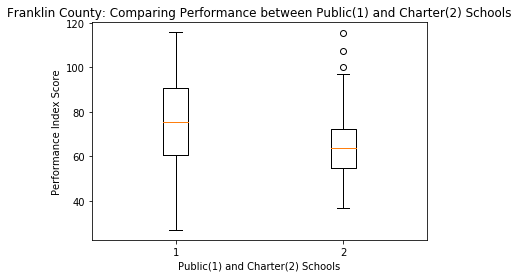

In [42]:
# ttest
public_df_franklin = public_df.loc[public_df["County"]== "Franklin"]
charter_df_franklin= charter_schools_df.loc[charter_schools_df["County"]=="Franklin"]
s1=public_df_franklin["Performance Index Score 2015-16"]
s2=charter_df_franklin["Performance Index Score 2016-17"]

plt.boxplot([s1, s2])
plt.title("Franklin County: Comparing Performance between Public(1) and Charter(2) Schools")
plt.xlabel("Public(1) and Charter(2) Schools")
plt.ylabel("Performance Index Score")
(t_stat, p) = stats.ttest_ind(s1, s2, equal_var=False)
print(t_stat)
print(p)

fig_pi=plt.gcf()

plt.savefig("Franklin County: Comparing Performance between Public(1) and Charter(2) Schools.png")

In [43]:
public_black_frank.corr()

,% of Total Enrollment,Performance Index Score 2015-16,Zip Code
% of Total Enrollment,1.000000,-0.705094,0.192698
Performance Index Score 2015-16,-0.705094,1.000000,-0.313603
Zip Code,0.192698,-0.313603,1.000000


In [44]:
charterblack_franklin.corr()

,Performance Index Score 2016-17,Zip Code,% of Total Enrollment
Performance Index Score 2016-17,1.000000,0.079866,-0.300756
Zip Code,0.079866,1.000000,-0.398429
% of Total Enrollment,-0.300756,-0.398429,1.000000


In [45]:
public_white_frank.corr()

,% of Total Enrollment,Performance Index Score 2015-16,Zip Code
% of Total Enrollment,1.000000,0.666587,-0.169167
Performance Index Score 2015-16,0.666587,1.000000,-0.313603
Zip Code,-0.169167,-0.313603,1.000000


In [46]:
charterwhite_franklin.corr()

,Performance Index Score 2016-17,Zip Code,% of Total Enrollment
Performance Index Score 2016-17,1.000000,0.079866,0.243059
Zip Code,0.079866,1.000000,0.455836
% of Total Enrollment,0.243059,0.455836,1.000000


In [47]:
public_latinx_frank.corr()

,% of Total Enrollment,Performance Index Score 2015-16,Zip Code
% of Total Enrollment,1.000000,-0.151200,0.040283
Performance Index Score 2015-16,-0.151200,1.000000,-0.313603
Zip Code,0.040283,-0.313603,1.000000


In [48]:
charterhispanic_franklin.corr()

,Performance Index Score 2016-17,Zip Code,% of Total Enrollment
Performance Index Score 2016-17,1.000000,0.079866,0.037038
Zip Code,0.079866,1.000000,-0.052932
% of Total Enrollment,0.037038,-0.052932,1.000000


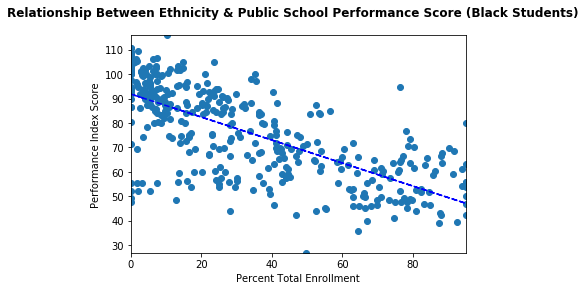

In [50]:
# public race-black-PI regression
x_black_franklin = public_black_frank["% of Total Enrollment"]
y_black_franklin = public_black_frank["Performance Index Score 2015-16"]

(pbf_slope, pbf_int, pbf_c_r, pbf_p, pbf_std_err) = stats.linregress(x_black_franklin, y_black_franklin)
fit = pbf_slope * x_black_franklin + pbf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity & Public School Performance Score (Black Students)", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_black_franklin), max(x_black_franklin))
ax.set_ylim(min( y_black_franklin), max( y_black_franklin))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_black_franklin,  y_black_franklin, linewidth=0, marker='o')
ax.plot(x_black_franklin, fit, 'b--')

fig_pubblack_franklin = plt.gcf()
plt.show()
fig_pubblack_franklin.savefig("Ethnicity & Public School Performance Score (Black Students).png")

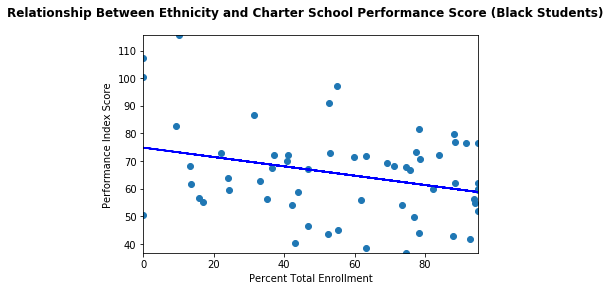

ValueError: Format 'png ' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

In [51]:
# charter race-black-PI regression

x_charterblk_franklin = charterblack_franklin["% of Total Enrollment"]
y_charterblk_franklin = charterblack_franklin["Performance Index Score 2016-17"]

(cbf_slope, cbf_int, cbf_c_r, cbf_p, cbf_std_err) = stats.linregress(x_charterblk_franklin, y_charterblk_franklin)
fit = cbf_slope * x_charterblk_franklin + cbf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (Black Students)", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_charterblk_franklin), max(x_charterblk_franklin))
ax.set_ylim(min(y_charterblk_franklin), max(y_charterblk_franklin))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_charterblk_franklin, y_charterblk_franklin, linewidth=0, marker='o')
ax.plot(x_charterblk_franklin, fit, 'b--')

fig_charblk_franklin = plt.gcf()
plt.show()

fig_charblk_franklin.savefig("Black Ethnicity & Charter School Performance Score (Franklin County).png ")


<IPython.core.display.Javascript object>


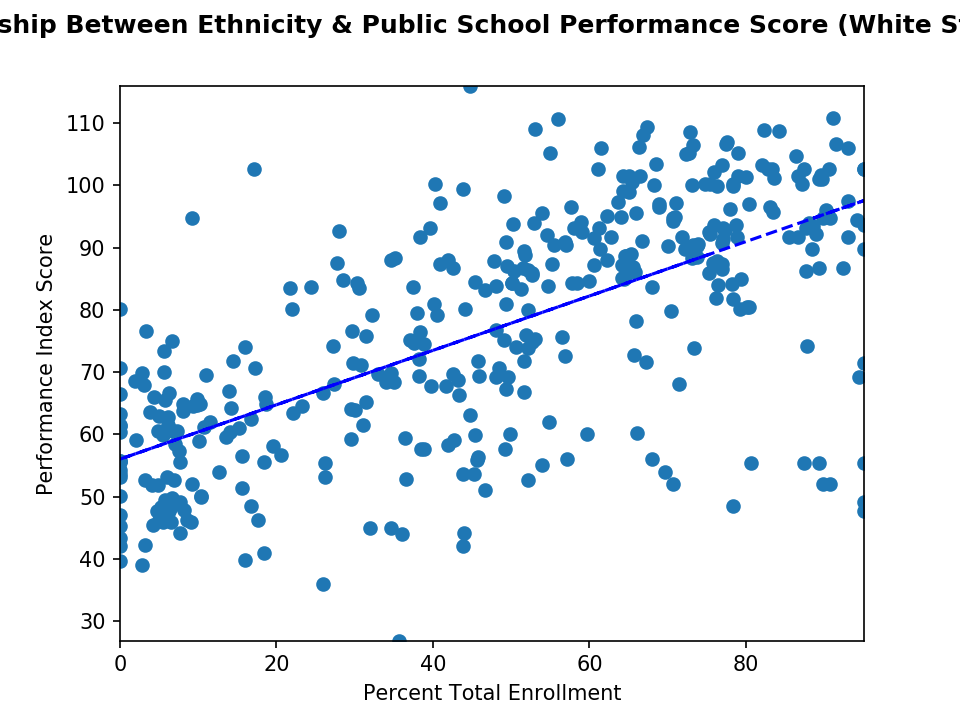

AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025F3031C158> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

In [52]:
# public race-white-PI regression
x_white_franklin = public_white_frank["% of Total Enrollment"]
y_white_franklin = public_white_frank["Performance Index Score 2015-16"]

(pwf_slope, pwf_int, pwf_c_r, pwf_p, pwf_std_err) = stats.linregress(x_white_franklin, y_white_franklin)
fit = pwf_slope * x_white_franklin + pwf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity & Public School Performance Score (White Students)", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_white_franklin), max(x_white_franklin))
ax.set_ylim(min( y_white_franklin), max( y_white_franklin))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_white_franklin,  y_black_franklin, linewidth=0, marker='o')
ax.plot(x_white_franklin, fit, 'b--')

fig_pubwhite_franklin = plt.gcf()
plt.show()
plt.savefig("White Ethnicity & Public School Performance Score (Franklin County).png")

In [53]:
# Charter race-white-PI 
x_charterwhite_franklin =charterwhite_franklin["% of Total Enrollment"]
y_charterwhite_franklin =charterwhite_franklin["Performance Index Score 2016-17"]

(cwf_slope, cwf_int, cwf_c_r, cwf_p, cwf_std_err) = stats.linregress(x_charterwhite_franklin, y_charterwhite_franklin)
fit = cwf_slope * x_charterwhite_franklin + cwf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (White Students)", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_charterwhite_franklin), max(x_charterwhite_franklin)
ax.set_ylim(min(y_charterwhite_franklin), max(y_charterwhite_franklin)

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_charterwhite_franklin, y_charterwhite_franklin, linewidth=0, marker='o')
ax.plot(x_charterwhite_franklin, fit, 'b--')

fig_charterwhite_franklin = plt.gcf()
            
plt.show()
            
plt.savefig("Ethnicity and Charter School Performance Score (White Students).png")            

SyntaxError: invalid syntax (<ipython-input-53-ff447baa67a4>, line 12)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025F3031C158> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

<IPython.core.display.Javascript object>


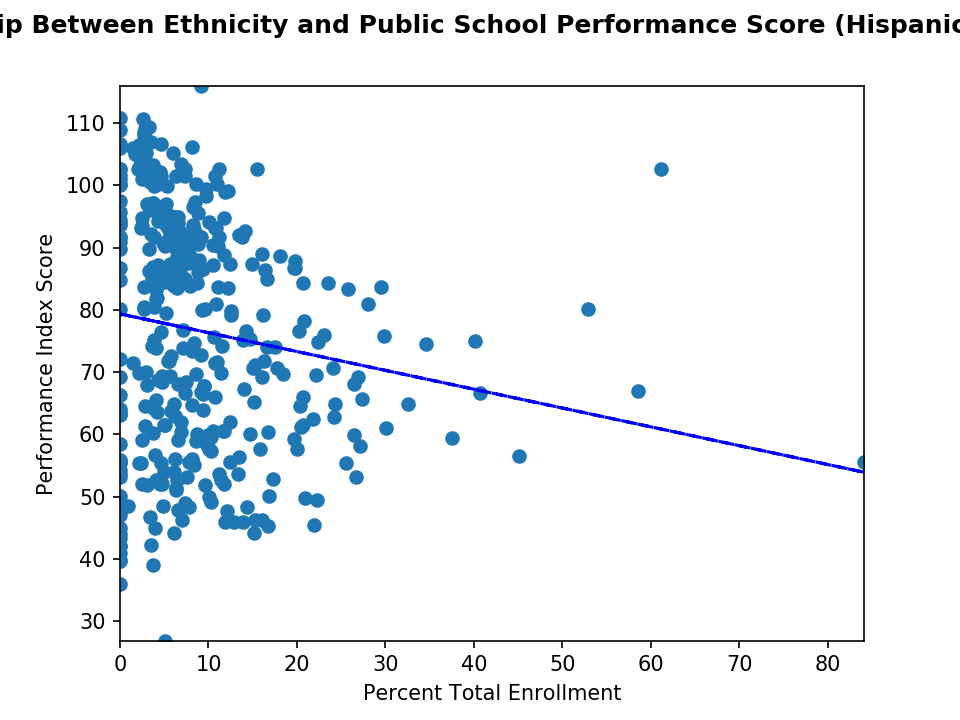

AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025F3031C158> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

In [54]:
# public race-hispanic-PI franklin

x_hispanic_franklin = public_latinx_frank["% of Total Enrollment"]
y_hispanic_franklin = public_latinx_frank["Performance Index Score 2015-16"]

(phf_slope, phf_int, phf_c_r, phf_p, phf_std_err) = stats.linregress(x_hispanic_franklin, y_hispanic_franklin)
fit = phf_slope * x_hispanic_franklin + phf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Public School Performance Score (Hispanic Students)", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_hispanic_franklin), max(x_hispanic_franklin))
ax.set_ylim(min(y_hispanic_franklin), max(y_hispanic_franklin))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_hispanic_franklin, y_hispanic_franklin, linewidth=0, marker='o')
ax.plot(x_hispanic_franklin, fit, 'b--')

fig_pubhispanic_franklin = plt.gcf()

plt.show()

plt.savefig("Hispanic Ethnicity & Public School Performance Score (Franklin County")

<IPython.core.display.Javascript object>


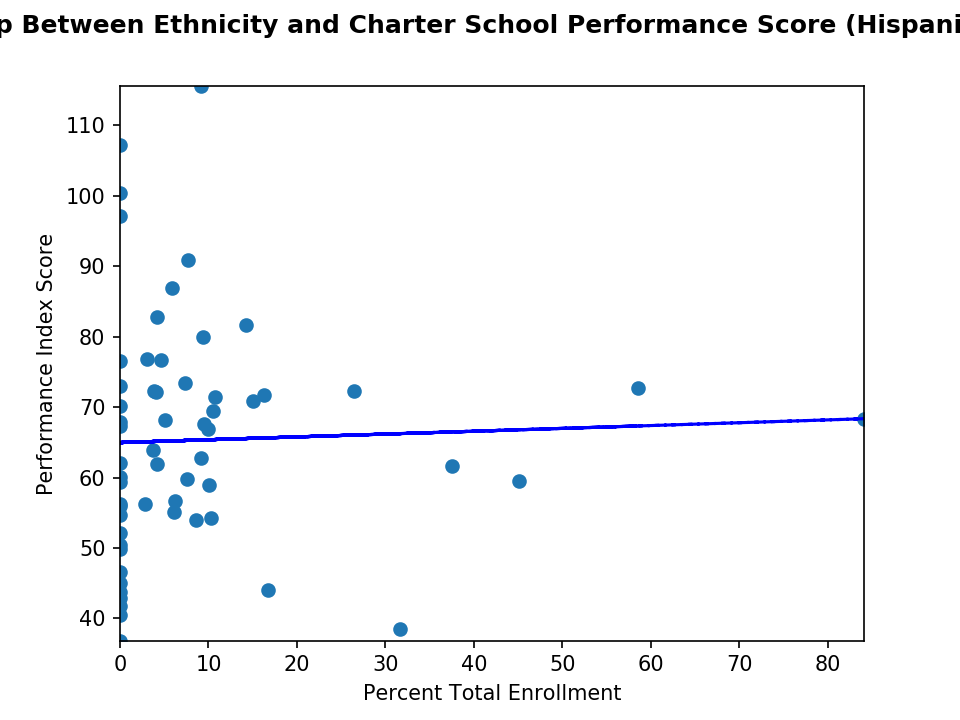

AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025D63F45F28> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

In [66]:
# charter race-hispanic-PI franklin

x_charterhispanic_frank = charterhispanic_franklin["% of Total Enrollment"]
y_charterhispanic_frank = charterhispanic_franklin["Performance Index Score 2016-17"]

(chf_slope, chf_int, chf_c_r, chf_p, chf_std_err) = stats.linregress(x_charterhispanic_frank, y_charterhispanic_frank)
fit = chf_slope * x_charterhispanic_frank + chf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (Hispanic Students)", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_charterhispanic_frank), max(x_charterhispanic_frank))
ax.set_ylim(min(y_charterhispanic_frank), max(y_charterhispanic_frank))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_charterhispanic_frank, y_charterhispanic_frank, linewidth=0, marker='o')
ax.plot(x_charterhispanic_frank, fit, 'b--')
     
fig_charterhispanic_frank = plt.gcf()

plt.show()

plt.savefig("Hispanic Ethnicity & Charter School Performance Score (Franklin County).png")


<IPython.core.display.Javascript object>


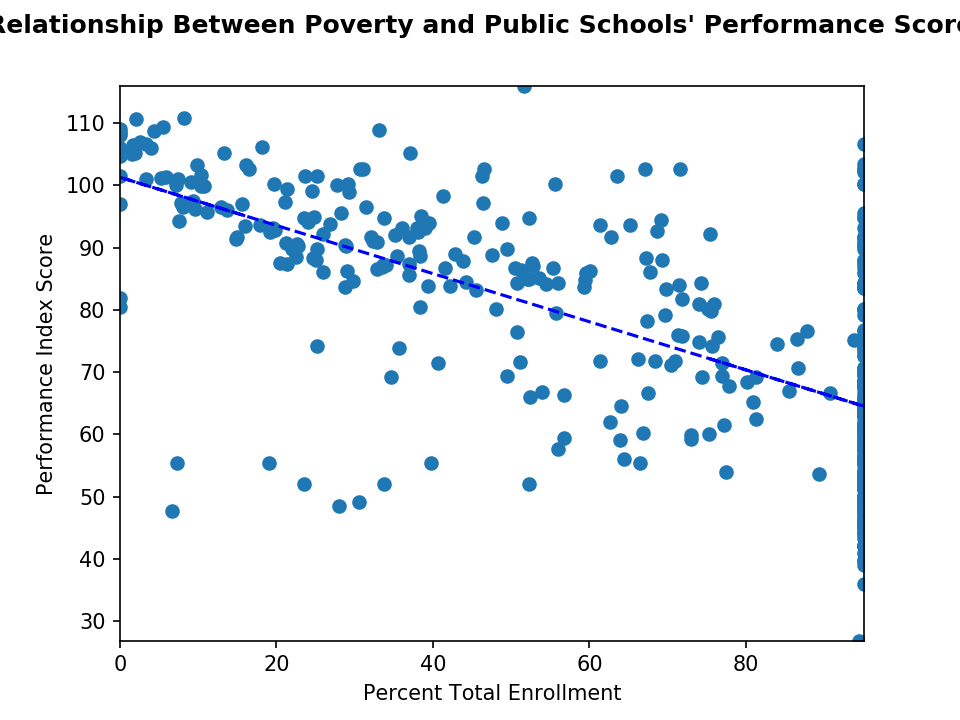

AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025F3031C158> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

In [55]:
# economic poor-PI franklin cnty
x_public_frank_poor =public_poor_frank["% of Total Enrollment"]
y_public_frank_poor =public_poor_frank["Performance Index Score 2015-16"]

(ppf_slope, ppf_int, ppf_c_r, ppf_p, ppf_std_err) = stats.linregress(x_public_frank_poor, y_public_frank_poor)
fit = ppf_slope * x_public_frank_poor + ppf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Poverty and Public Schools' Performance Score", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_public_frank_poor), max(x_public_frank_poor))
ax.set_ylim(min(y_public_frank_poor), max(y_public_frank_poor))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_public_frank_poor, y_public_frank_poor, linewidth=0, marker='o')
ax.plot(x_public_frank_poor, fit, 'b--')

fig_pubpoor_frank = plt.gcf()

plt.show()

plt.savefig("Relationship Between Poverty and Public Schools' Performance Score (Franklin County).png")

<IPython.core.display.Javascript object>


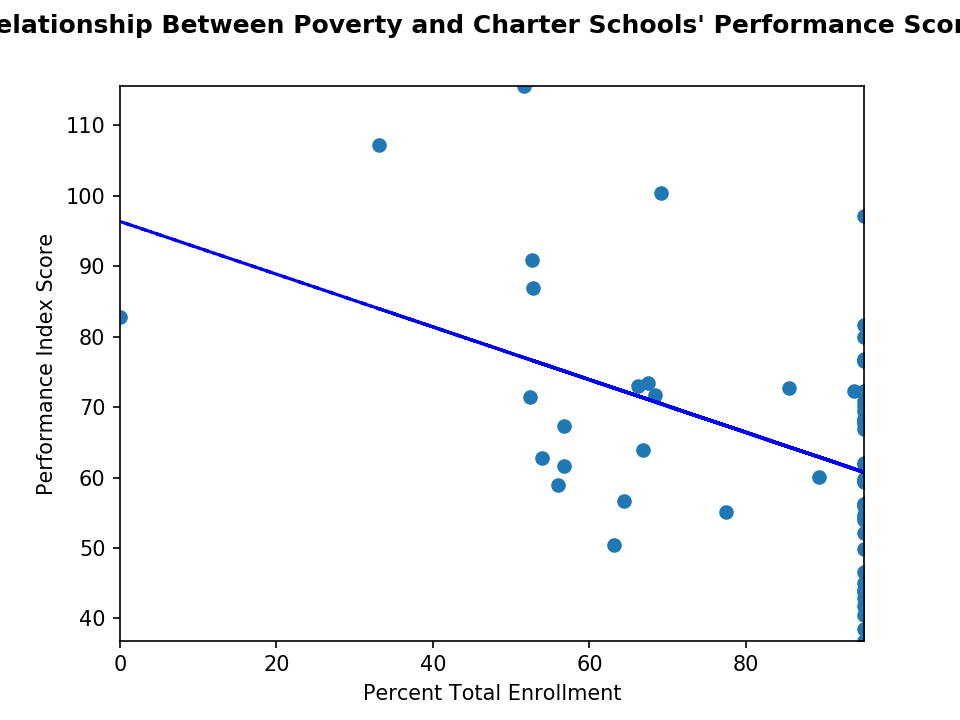

AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025D63F45F28> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

In [70]:
# charter poor-PI franklin
x_charter_frank_poor =charter_disadv_franklin["% of Total Enrollment"]
y_charter_frank_poor =charter_disadv_franklin["Performance Index Score 2016-17"]

(cpf_slope, cpf_int, cpf_c_r, cpf_p, cpf_std_err) = stats.linregress(x_charter_frank_poor, y_charter_frank_poor)
fit = cpf_slope * x_charter_frank_poor + cpf_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Poverty and Charter Schools' Performance Score", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_charter_frank_poor), max(x_charter_frank_poor))
ax.set_ylim(min(y_charter_frank_poor), max(y_charter_frank_poor))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_charter_frank_poor, y_charter_frank_poor, linewidth=0, marker='o')
ax.plot(x_charter_frank_poor, fit, 'b--')

fig_charpoor_frank = plt.gcf()

plt.show()

plt.savefig("Relationship Between Poverty and Charter Schools' Performance Score (Franklin County).png")


In [52]:
# public payroll-PI franklin
x_public_pay_frank = public_pay_franklin["Total Annual Payroll"]
y_public_pay_frank = public_pay_franklin["Performance Index Score 2015-16"]

(pfp_slope, pfp_int, pfp_c_r, pfp_p, pfp_std_err) = stats.linregress(x_public_pay_frank, y_public_pay_frank)
fit = pfp_slope * x_public_pay_frank + pfp_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Annual Payroll in Zip Code and Public Schools' Performance Score", fontsize=12, fontweight="bold")

ax.set_xlim(min(x_public_pay_frank), max(x_public_pay_frank))
ax.set_ylim(min(y_public_pay_frank), max(y_public_pay_frank))

ax.set_xlabel("Annual Payroll in Zip Code")
ax.set_ylabel("Performance Index Score")

ax.plot(x_public_pay_frank, y_public_pay_frank, linewidth=0, marker='o')
ax.plot(x_public_pay_frank, fit, 'b--')

fig_public_pay_frank = plt.gcf()

plt.show()

fig_public_pay_frank.savefig("Relationship Between Annual Payroll in Zip Code and Public Schools' Performance Score (Franklin County).png")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [57]:
# charter payroll-PI franklin
x_chart_pay_franklin =charter_pay_franklin["Total Annual Payroll"]
y_chart_pay_franklin =charter_pay_franklin["Performance Index Score 2016-17"]

(fcp_slope, fcp_int, fcp_c_r, fcp_p, fcp_std_err) = stats.linregress(x_chart_pay_franklin , y_chart_pay_franklin)
fit = fcp_slope * x_chart_pay_franklin + fcp_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Annual Payroll in Zip Code and Charter Schools' Performance Score", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_chart_pay_franklin), max(x_chart_pay_franklin))
ax.set_ylim(min(y_chart_pay_franklin), max(y_chart_pay_franklin))

ax.set_xlabel("Annual Payroll in Zip Code")
ax.set_ylabel("Performance Index Score")

ax.plot(x_chart_pay_franklin, y_chart_pay_franklin, linewidth=0, marker='o')
ax.plot(x_chart_pay_franklin, fit, 'b--')

fig_charpay_franklin = plt.gcf()

plt.show()

plt.savefig("Relationship Between Annual Payroll in Zip Code and Charter Schools' Performance Score (Franklin County).png")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025F3031C158> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'